In [1]:
#include "include/math60082_cn.hpp"
#include "include/math60082_sor.hpp"
#include <iostream>
#include <vector>
#include <chrono>
#include <string>
#include <fstream>

#include "xtl/xbase64.hpp"
#include "xeus/xjson.hpp"
using namespace std;

In [2]:
.L lib/libmath60082.so

In [3]:
namespace im
{
    struct image
    {   
        inline image(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);   
            m_buffer << fin.rdbuf();
        }
        
        std::stringstream m_buffer;
    };
    
    xeus::xjson mime_bundle_repr(const image& i)
    {
        auto bundle = xeus::xjson::object();
        bundle["image/png"] = xtl::base64encode(i.m_buffer.str());
        return bundle;
    }
}

In [4]:
system("gnuplot \"plotFiles/plotSinFunction.plt\"")

0

In [5]:
.> out.txt

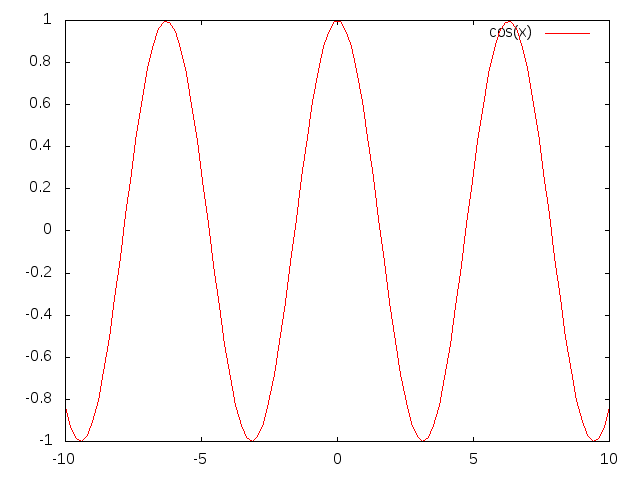

In [6]:
im::image testImage("images/test.png");
testImage

In [7]:
cout << MATH60082::normalDistribution(0.) << "\n";
cout << MATH60082::normalDistribution(1.) << "\n";
cout << MATH60082::normalDistribution(2.) << "\n";

0.5
0.841345
0.97725


In [8]:
// declare and initialise Black Scholes parameters
double S0,X,T,r,sigma;
// declare and initialise grid paramaters 
int iMax,jMax;
// declare and initialise local variables (ds,dt)
double SMax;

In [9]:
// initialise Black Scholes parameters
S0=1.936;X=2.;T=1.;r=0.05;sigma=0.2;
cout << " n    | V_cn     | V_exact  | error | CPU (time) \n";
for(int k=1;k<=7;k++)
{
    int n=10*pow(2,k);
    iMax = n;
    jMax = n;
    
    double value_exact = MATH60082::europeanPut_exact(S0,X,T,r,sigma);
    auto start = chrono::system_clock::now();
    double value_cn = MATH60082::americanPut_CN(S0,X,T,r,sigma,iMax,jMax,5*X,1.4,1.e-10,10000);
    auto end = chrono::system_clock::now();
    auto elapsed = chrono::duration_cast<chrono::milliseconds>(end - start);
  
    cout << n << " | " << value_cn;
    cout << " | " << value_exact << " | " ;
    cout << value_cn - value_exact << " | " ;
    cout << elapsed.count()/1000.<< "\n";
}

 n    | V_cn     | V_exact  | error | CPU (time) 
20 | 0.134715 | 0.136688 | -0.00197309 | 0
40 | 0.148865 | 0.136688 | 0.0121772 | 0
80 | 0.15086 | 0.136688 | 0.0141719 | 0.001
160 | 0.150045 | 0.136688 | 0.0133566 | 0.005
320 | 0.150447 | 0.136688 | 0.013759 | 0.017
640 | 0.150541 | 0.136688 | 0.0138525 | 0.059
1280 | 0.150561 | 0.136688 | 0.0138723 | 0.194


In [10]:
{
    // declare vector to store matrix A
vector<double> a = { 0.,-1,-1,-1};
vector<double> b = { 1.,2,2,1};
vector<double> c = { 0.,-1,-1,0.};
// declare vector for the rhs v and solution x 
vector<double> rhs = {1.,0.25,0.5,0.};
vector<double> x;
// reset initial guess for x
x = {0.,0.,0.,0.};
int sor;
// iterMax=50, tol=1.e-6, omega = 1
MATH60082::sorSolve(a,b,c,rhs,x,50,1.e-6,1.,sor);
cout << "x = { ";
for(auto xi : x)cout << xi << " ";
cout << "} after " << sor+1 << " iterations.\n";
}

x = { 1 1.75 2.25 2.25 } after 50 iterations.


In [11]:
double sqr(double a)
{
    return a * a;
}

In [12]:
.> out.txt

In [13]:
double a = 2.5;
double asqr = sqr(a);
asqr

6.25

In [15]:
?

No documentation found for 
